In [ ]:
# !pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# upload = files.upload()

In [ ]:
data = pd.read_csv('/content/sample_data/diamonds.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Identifying the OUTLIERS

In [ ]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='depth'>

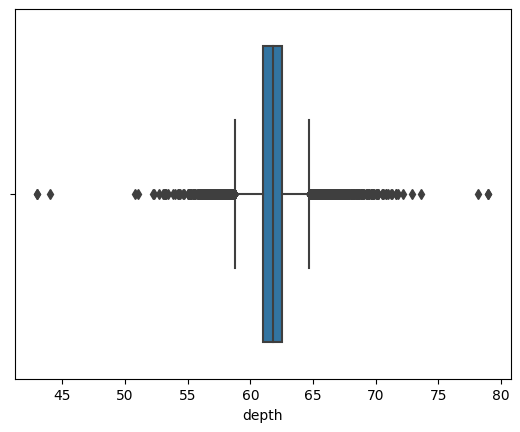

In [ ]:
sns.boxplot(x = data["depth"])

<Axes: >

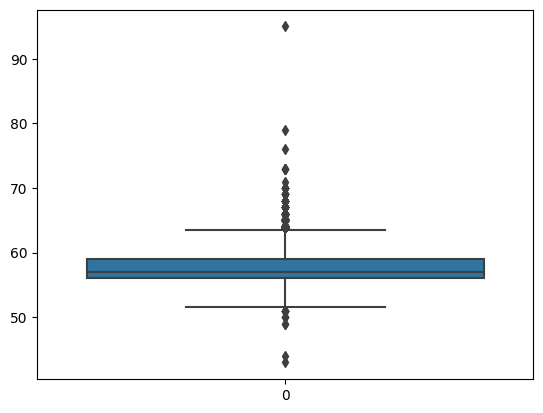

In [ ]:
sns.boxplot(data["table"])

In [ ]:
# Q1 = data["tabel"].quantile(0.25)
# Q3 = data["tabel"].quantile(0.75)

# IQR = Q3 - Q1
# outliers = (data['table'] < )

In [ ]:
np.where(data['table'] > 75)
data = data[(data['table'] <= 75) & (data['table'] >= 45)]



<Axes: >

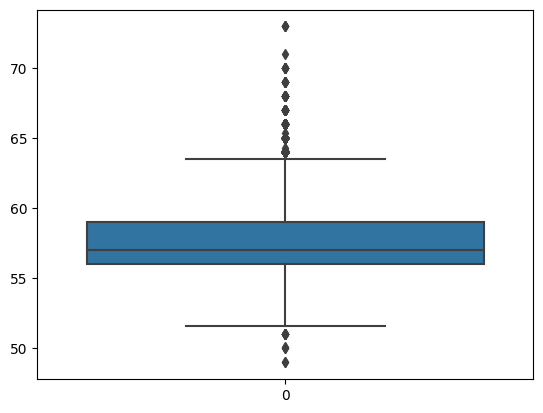

In [ ]:
sns.boxplot(data["table"])

<Axes: >

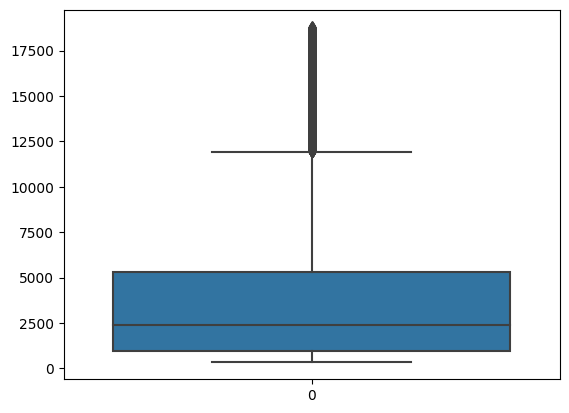

In [ ]:
sns.boxplot(data["price"])

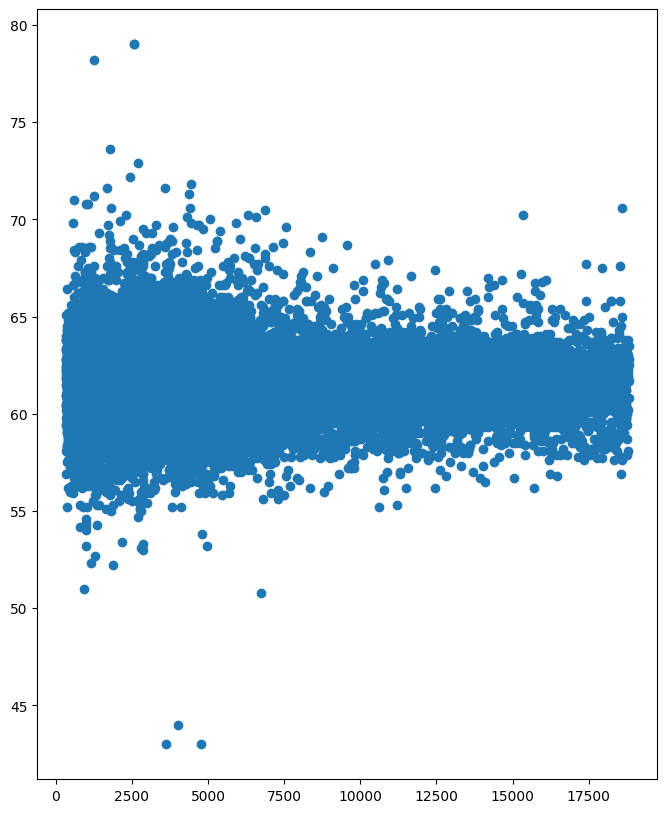

In [ ]:
fig, ax = plt.subplots(figsize = (8, 10))
ax.scatter(data["price"], data['depth'])

In [ ]:
data = data[(data['depth'] <= 75) & (data['depth'] >= 50)]

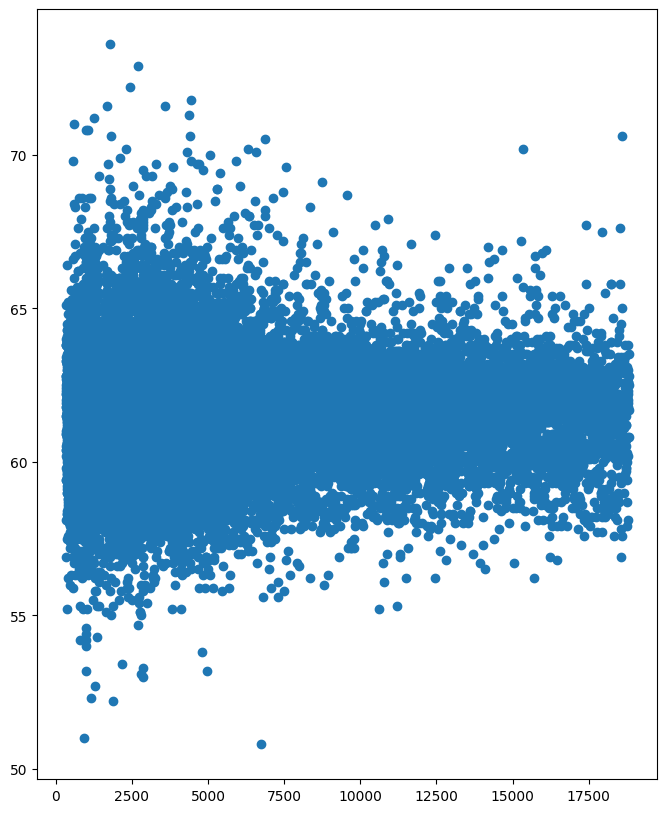

In [ ]:
fig, ax = plt.subplots(figsize = (8, 10))
ax.scatter(data["price"], data['depth'])

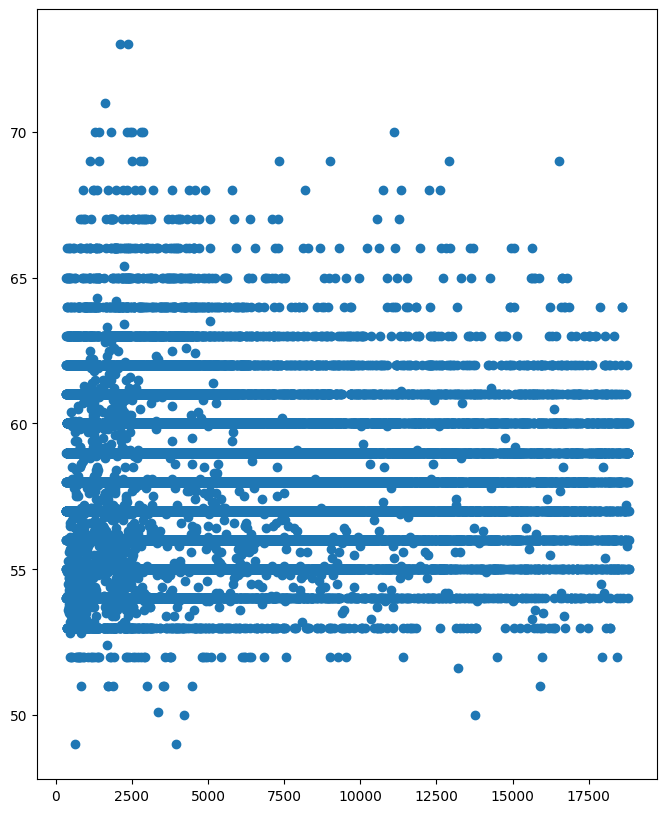

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(data["price"], data['table'])

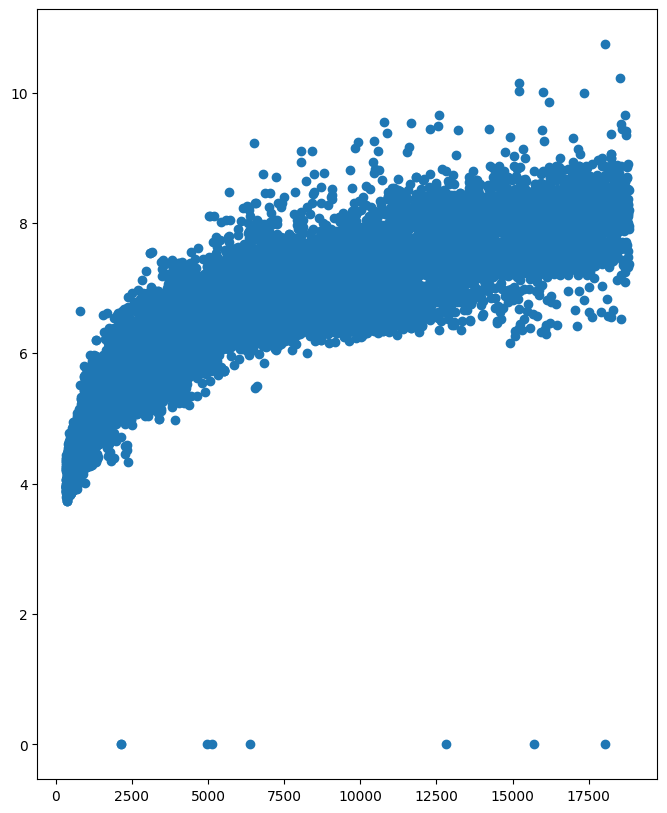

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(data["price"], data['x'])

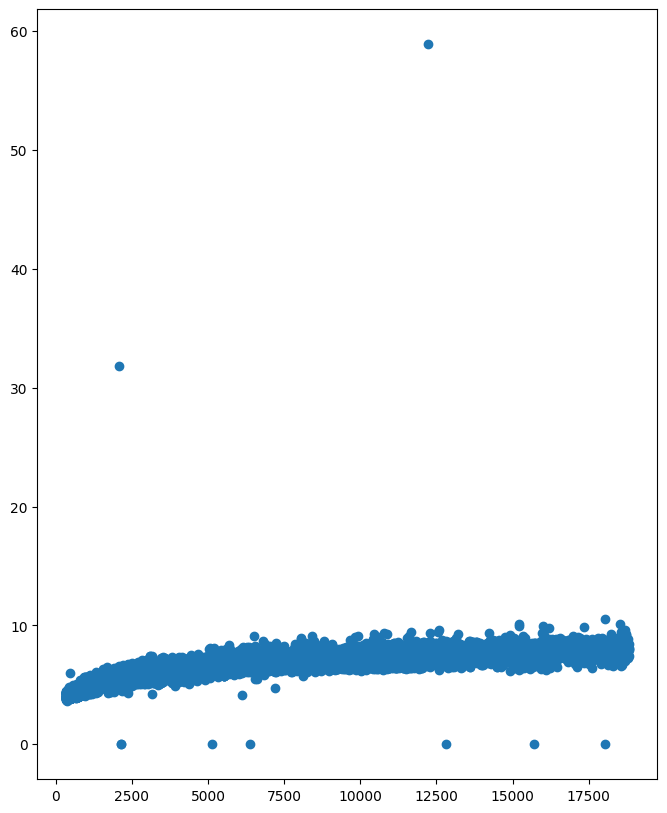

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(data["price"], data['y'])

In [ ]:
data = data[(data['y']<=30) & (data['y']>=1)]

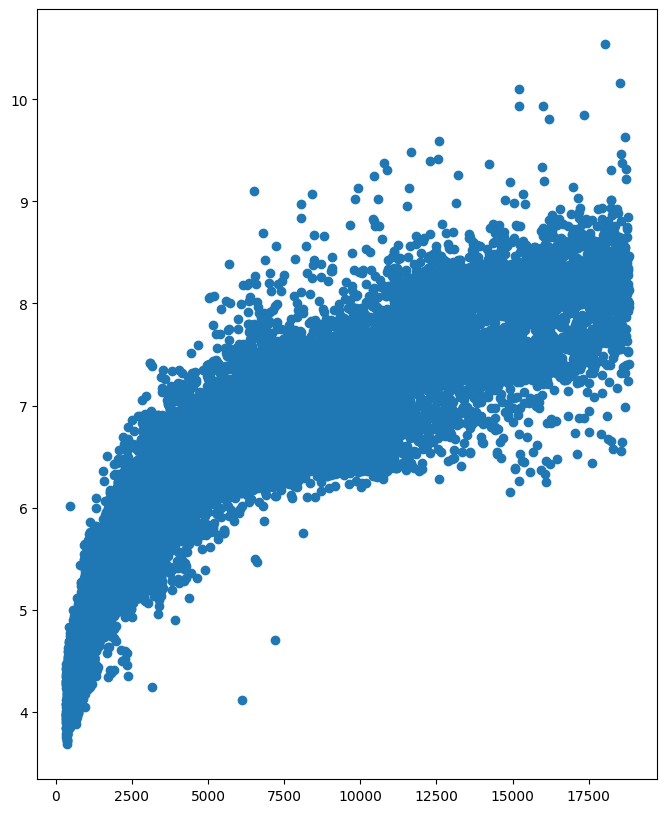

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(data["price"], data['y'])

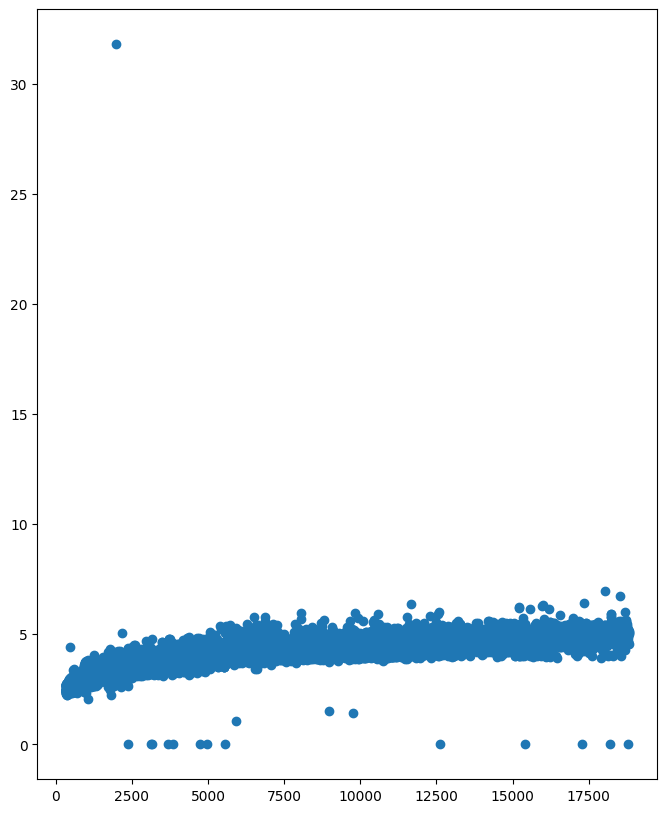

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(data["price"], data["z"])


In [ ]:
data = data[(data['z']<=30) & (data['z']>=2)]

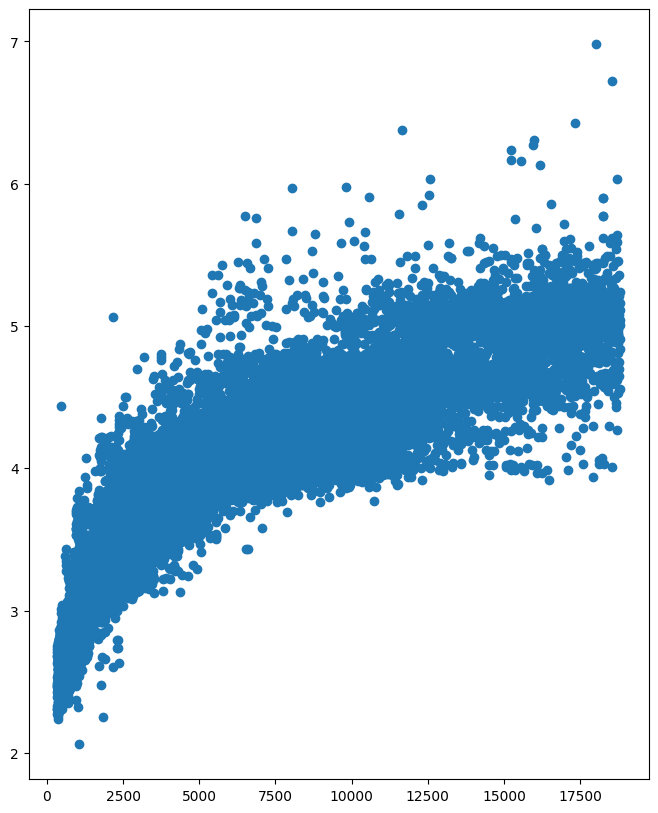

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(data["price"], data["z"])


**Transforming DESCRIPTIVE data to NUMERICAL data**

In [ ]:
data


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

**Label encoding for ordered descriptive data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [ ]:
# Assuming 'data' is a DataFrame and 'categorical_column' is the column you want to encode
data['cut'] = label_encoder.fit_transform(data['cut'])


In [ ]:
data


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Doing One Hot Encoding (Dummies technique) for Colors **

In [ ]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['color'], prefix='Color')


In [ ]:
data

,carat,cut,clarity,depth,table,price,x,y,z,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,2,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,0.72,1,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,0.70,4,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,0.86,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


In [ ]:
# Define an ordinal mapping
clarity_mapping = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}


# Apply the ordinal mapping
data['clarity'] = data['clarity'].map(clarity_mapping)

In [ ]:
# Calculate the correlations
correlations = data.corrwith(data['price'])

# Display the correlations
correlations

carat      0.921592
cut        0.039974
clarity   -0.146766
depth     -0.010227
table      0.127465
price      1.000000
x          0.887212
y          0.888807
z          0.882636
Color_D   -0.072509
Color_E   -0.100808
Color_F   -0.024032
Color_G    0.008563
Color_H    0.058690
Color_I    0.097143
Color_J    0.081904
dtype: float64

In [ ]:
label = data["price"]

In [ ]:
data = data.drop(columns=['price'])
data

,carat,cut,clarity,depth,table,x,y,z,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,2,1,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,2,60.8,57.0,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,0.72,1,2,63.1,55.0,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,0.70,4,2,62.8,60.0,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,0.86,3,1,61.0,58.0,6.15,6.12,3.74,0,0,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53903 entries, 0 to 53939
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53903 non-null  float64
 1   cut      53903 non-null  int64  
 2   clarity  53903 non-null  int64  
 3   depth    53903 non-null  float64
 4   table    53903 non-null  float64
 5   x        53903 non-null  float64
 6   y        53903 non-null  float64
 7   z        53903 non-null  float64
 8   Color_D  53903 non-null  uint8  
 9   Color_E  53903 non-null  uint8  
 10  Color_F  53903 non-null  uint8  
 11  Color_G  53903 non-null  uint8  
 12  Color_H  53903 non-null  uint8  
 13  Color_I  53903 non-null  uint8  
 14  Color_J  53903 non-null  uint8  
dtypes: float64(6), int64(2), uint8(7)
memory usage: 4.1 MB


In [ ]:
sumcut = data["x"].isna().sum()
sumcut

0

In [ ]:
num_rows = len(label)
print("Number of rows in 'label':", num_rows)


Number of rows in 'label': 53903


In [ ]:
num_rows = len(data)
print("Number of rows in 'label':", num_rows)

Number of rows in 'label': 53903


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns =  data.columns)
scaled_df.head()


,carat,cut,clarity,depth,table,x,y,z,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,-1.198114,-0.538733,-1.245618,-0.175740,-1.105575,-1.591485,-1.577790,-1.604555,-0.379122,2.122584,-0.463581,-0.514466,-0.4265,-0.334318,-0.234384
1,-1.240328,0.434663,-0.638488,-1.373145,1.595646,-1.645086,-1.703774,-1.778106,-0.379122,2.122584,-0.463581,-0.514466,-0.4265,-0.334318,-0.234384
2,-1.198114,-1.512129,0.575773,-3.415779,3.396461,-1.502151,-1.496801,-1.778106,-0.379122,2.122584,-0.463581,-0.514466,-0.4265,-0.334318,-0.234384
3,-1.071471,0.434663,-0.031357,0.458181,0.245036,-1.368149,-1.352819,-1.315303,-0.379122,-0.471124,-0.463581,-0.514466,-0.4265,2.991160,-0.234384
4,-1.029256,-1.512129,-1.245618,1.092102,0.245036,-1.243081,-1.244833,-1.141751,-0.379122,-0.471124,-0.463581,-0.514466,-0.4265,-0.334318,4.266505


In [ ]:
scaled_df.describe()

,carat,cut,clarity,depth,table,x,y,z,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
count,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04,5.390300e+04
mean,-4.049473e-16,-1.368279e-16,1.392006e-16,1.064832e-15,-1.810135e-15,4.260383e-16,-5.104023e-16,7.803671e-16,-2.003645e-17,-4.745476e-18,7.592761e-17,-4.956386e-17,-3.058196e-17,-8.436402e-18,5.694571e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261435e+00,-2.485525e+00,-1.852748e+00,-7.712352e+00,-3.806796e+00,-1.788021e+00,-1.847755e+00,-2.139671e+00,-3.791216e-01,-4.711239e-01,-4.635808e-01,-5.144662e-01,-4.264996e-01,-3.343185e-01,-2.343839e-01
25%,-8.392914e-01,-5.387330e-01,-6.384877e-01,-5.279177e-01,-6.553714e-01,-9.125432e-01,-9.118767e-01,-9.103496e-01,-3.791216e-01,-4.711239e-01,-4.635808e-01,-5.144662e-01,-4.264996e-01,-3.343185e-01,-2.343839e-01
50%,-2.060755e-01,-5.387330e-01,-3.135727e-02,3.556736e-02,-2.051678e-01,-2.813216e-02,-2.099232e-02,-1.366814e-02,-3.791216e-01,-4.711239e-01,-4.635808e-01,-5.144662e-01,-4.264996e-01,-3.343185e-01,-2.343839e-01
75%,5.115693e-01,4.346631e-01,5.757731e-01,5.286168e-01,6.952393e-01,7.222772e-01,7.259107e-01,7.239247e-01,-3.791216e-01,-4.711239e-01,-4.635808e-01,-5.144662e-01,-4.264996e-01,-3.343185e-01,-2.343839e-01
max,8.891127e+00,1.408059e+00,2.397164e+00,8.346972e+00,6.998089e+00,4.474324e+00,4.325443e+00,4.975930e+00,2.637676e+00,2.122584e+00,2.157121e+00,1.943762e+00,2.344668e+00,2.991160e+00,4.266505e+00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(scaled_df)
y = np.array(label)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.9106531850834118


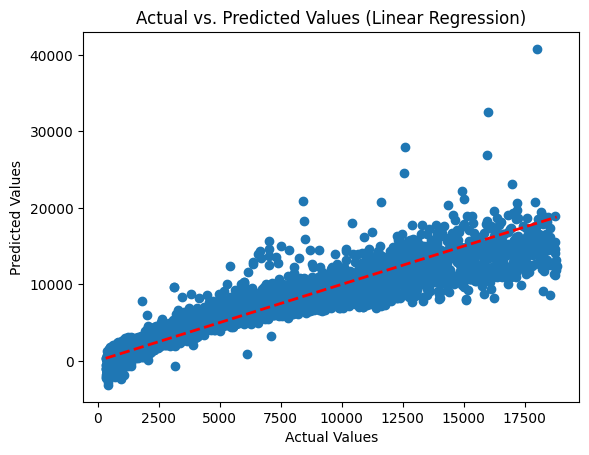

In [ ]:
# Make predictions on the test data
y_pred = regr.predict(X_test)

# Create a scatter plot to visualize the predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 1445658.711465612
